### ARL meteorlogical file comparison

Jupyter notebook.

Runs the profile program on the GEFS as well as gfs0.25 degree datasets and compares the output.

In [1]:
%load_ext autoreload
import datetime
import numpy as np
import matplotlib.pyplot as plt
import utiltesting
from utiltesting.testmet import compare_mets
from utilhysplit.metfiles import MetFiles


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [2]:
# set directory for hysplit executable
hdir = '/hysplit-users/alicec/hysplit.v5.1.0/exec/'
# set directory where met data is.
tdir = '/hysplit-users/alicec/gefsnew/'
# set lat and lon to feed into profile probram
lat = 55.978
lon = 160.587
# set date of files to look for.
d1 = datetime.datetime(2020,10,21)
d2 = datetime.datetime(2020,10,22)
adir = '/pub/archives/gfs0p25/'

In [3]:
%autoreload


duration = 24
#d2 = d1 + datetime.timedelta(hours=duration)
metlist = []
labels = []

gfslist = []
for dt in [d1,d2]:
    dstr = dt.strftime('%Y%m%d')
    gname = '{}_gfs0p25'.format(dstr)
    gfslist.append((adir,gname))
labels.append('gfs0p25')
metlist.append(gfslist)

def get_suffix():
    slist = ['gec00']
    for num in np.arange(1,31):
        slist.append('gep{:02d}'.format(num))
    return slist
# add in all the gfs members.
for suffix in get_suffix():
    gefslist = []
 
    dstr = d1.strftime('%Y%m%d')
    gname = '{}{}'.format(tdir,dstr)
    fname = '/hysplit.t18z.gefs.{}'.format(suffix)
    gefslist.append((gname,fname))
    dstr = d2.strftime('%Y%m%d')
    gname = '{}{}'.format(tdir,dstr)
    fname = '/hysplit.t00z.gefs.{}'.format(suffix)
    gefslist.append((gname,fname))

    metlist.append(gefslist)
    #mf = MetFiles('{}{}/hysplit.t00z.gefs.{}'.format(tdir,dstr,suffix),hours=24)
    #print(mf.mdt)
    #print(suffix)
    #metlist.append(mf.get_files(d1,duration))
    
    labels.append(suffix)

#print(labels)
#print(metlist)


In [4]:
metlist

[[('/pub/archives/gfs0p25/', '20201021_gfs0p25'),
  ('/pub/archives/gfs0p25/', '20201022_gfs0p25')],
 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gec00'),
  ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gec00')],
 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep01'),
  ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep01')],
 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep02'),
  ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep02')],
 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep03'),
  ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep03')],
 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep04'),
  ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep04')],
 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep05'),
  ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep05')],
 [('/

In [5]:
%autoreload
cp = compare_mets.CompareMetProfile(metlist,d1,d2,lat,lon,hdir,labels=labels)

In [6]:
%autoreload
cp.call_and_read(nstop=200,overwrite=False)

0 [('/pub/archives/gfs0p25/', '20201021_gfs0p25'), ('/pub/archives/gfs0p25/', '20201022_gfs0p25')]
20201021_gfs0p25_profile.txt 20201021_gfs0p25 /pub/archives/gfs0p25/
20201022_gfs0p25_profile.txt 20201022_gfs0p25 /pub/archives/gfs0p25/
1 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gec00'), ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gec00')]
hysplit.t18z.gefs.gec00_profile.txt /hysplit.t18z.gefs.gec00 /hysplit-users/alicec/gefsnew/20201021
hysplit.t00z.gefs.gec00_profile.txt /hysplit.t00z.gefs.gec00 /hysplit-users/alicec/gefsnew/20201022
2 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep01'), ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep01')]
hysplit.t18z.gefs.gep01_profile.txt /hysplit.t18z.gefs.gep01 /hysplit-users/alicec/gefsnew/20201021
hysplit.t00z.gefs.gep01_profile.txt /hysplit.t00z.gefs.gep01 /hysplit-users/alicec/gefsnew/20201022
3 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep

In [7]:
cp.labels

['gfs0p25',
 'gec00',
 'gep01',
 'gep02',
 'gep03',
 'gep04',
 'gep05',
 'gep06',
 'gep07',
 'gep08',
 'gep09',
 'gep10',
 'gep11',
 'gep12',
 'gep13',
 'gep14',
 'gep15',
 'gep16',
 'gep17',
 'gep18',
 'gep19',
 'gep20',
 'gep21',
 'gep22',
 'gep23',
 'gep24',
 'gep25',
 'gep26',
 'gep27',
 'gep28',
 'gep29',
 'gep30']

### Following tables show which variables are available in the files

In [8]:
%autoreload
cp.compare_variables()
print(cp.df2.reset_index().sort_values(by='index',axis=0))
print(cp.df3.reset_index().sort_values(by='index',axis=0))

   index  gfs0p25  gec00  gep01  gep02  gep03  gep04  gep05  gep06  gep07  \
11  CAPE    False   True   True   True   True   True   True   True   True   
18  DSWF     True   True   True   True   True   True   True   True   True   
19  LHTF     True  False  False  False  False  False  False  False  False   
5   MSLE     True  False  False  False  False  False  False  False  False   
17  MSLP    False   True   True   True   True   True   True   True   True   
2   PBLH     True   True   True   True   True   True   True   True   True   
7   PRSS     True   True   True   True   True   True   True   True   True   
13  PTRO     True  False  False  False  False  False  False  False  False   
14  RGHS     True  False  False  False  False  False  False  False  False   
20  RH2M    False   True   True   True   True   True   True   True   True   
4   SHGT     True   True   True   True   True   True   True   True   True   
10  SHTF     True   True   True   True   True   True   True   True   True   

### time series plots of all the surface variables found in the files.

In [9]:
cp.df2

,gfs0p25,gec00,gep01,gep02,gep03,gep04,gep05,gep06,gep07,gep08,...,gep21,gep22,gep23,gep24,gep25,gep26,gep27,gep28,gep29,gep30
T02M,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
UMOF,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PBLH,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
USTR,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SHGT,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
MSLE,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TCLD,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PRSS,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
U10M,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
SPH2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'list'> ['PBLH']
<class 'list'>
PBLH


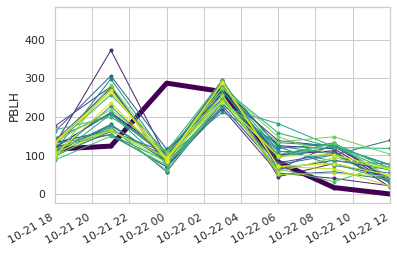

In [10]:
%autoreload
cp.set_ref('gfs0p25')
ax = cp.standard_surface_plots(varlist=['PBLH'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
d1 = datetime.datetime(2020,10,21,18,0)
d2 = datetime.datetime(2020,10,22,12,0)
ax.set_xlim(d1,d2)
plt.savefig('PBLH_GEFS_vs_GFS0p25.png')
plt.show()

<class 'list'> ['TPP6']
<class 'list'>
TPP6


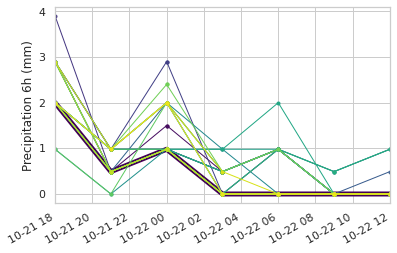

In [11]:
%autoreload
cp.set_ref('gfs0p25')
ax = cp.standard_surface_plots(varlist=['TPP6'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
d1 = datetime.datetime(2020,10,21,18,0)
d2 = datetime.datetime(2020,10,22,12,0)
ax.set_xlim(d1,d2)
ax.set_ylabel('Precipitation 6h (mm)')
plt.savefig('TPP6_GEFS_vs_GFS0p25.png')
plt.show()

<class 'list'> ['SHTF']
<class 'list'>
SHTF


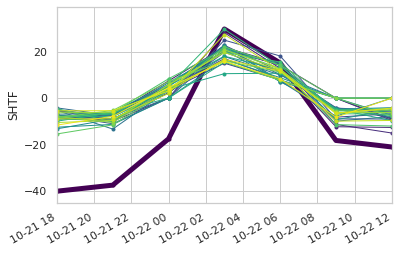

<class 'list'> ['DSWF']
<class 'list'>
DSWF


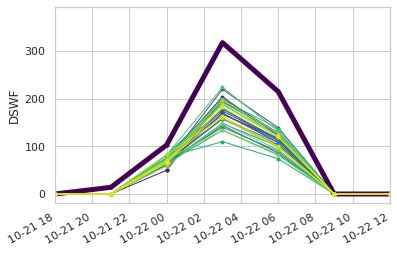

<class 'list'> ['USTR']
<class 'list'>
USTR


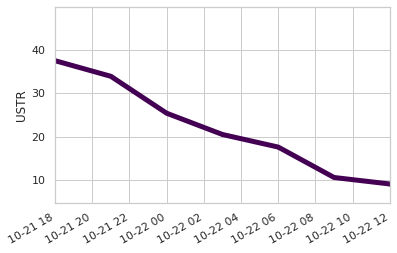

<class 'list'> ['UMOF']
<class 'list'>
UMOF


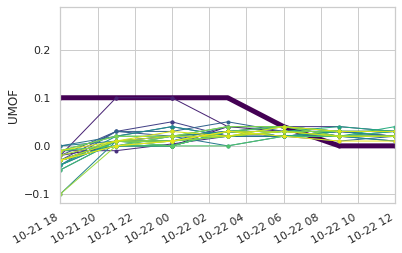

<class 'list'> ['VMOF']
<class 'list'>
VMOF


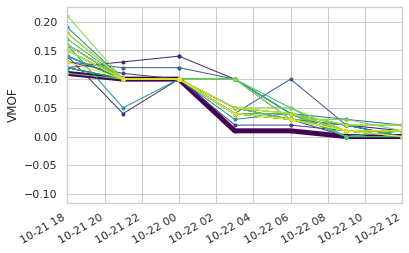

In [12]:
%autoreload
cp.set_ref('gfs0p25')
ax = cp.standard_surface_plots(varlist=['SHTF'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
d1 = datetime.datetime(2020,10,21,18,0)
d2 = datetime.datetime(2020,10,22,12,0)
ax.set_xlim(d1,d2)
plt.show()
%autoreload
cp.set_ref('gfs0p25')
ax = cp.standard_surface_plots(varlist=['DSWF'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
ax.set_xlim(d1,d2)
plt.show()
%autoreload
cp.set_ref('gfs0p25')
ax = cp.standard_surface_plots(varlist=['USTR'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
ax.set_xlim(d1,d2)
plt.show()
ax = cp.standard_surface_plots(varlist=['UMOF'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
ax.set_xlim(d1,d2)
plt.show()
ax = cp.standard_surface_plots(varlist=['VMOF'],plotall=False)
legend = ax.get_legend()
#ax.legend_=None
legend.set_visible(False)
ax.set_xlim(d1,d2)
plt.show()

### Plot 3D variable profiles at one time.

In [15]:
%autoreload
cp.call_and_read(nstop=200,overwrite=False)

0 [('/pub/archives/gfs0p25/', '20201021_gfs0p25'), ('/pub/archives/gfs0p25/', '20201022_gfs0p25')]
20201021_gfs0p25_profile.txt 20201021_gfs0p25 /pub/archives/gfs0p25/
20201022_gfs0p25_profile.txt 20201022_gfs0p25 /pub/archives/gfs0p25/
1 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gec00'), ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gec00')]
hysplit.t18z.gefs.gec00_profile.txt /hysplit.t18z.gefs.gec00 /hysplit-users/alicec/gefsnew/20201021
hysplit.t00z.gefs.gec00_profile.txt /hysplit.t00z.gefs.gec00 /hysplit-users/alicec/gefsnew/20201022
2 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep01'), ('/hysplit-users/alicec/gefsnew/20201022', '/hysplit.t00z.gefs.gep01')]
hysplit.t18z.gefs.gep01_profile.txt /hysplit.t18z.gefs.gep01 /hysplit-users/alicec/gefsnew/20201021
hysplit.t00z.gefs.gep01_profile.txt /hysplit.t00z.gefs.gep01 /hysplit-users/alicec/gefsnew/20201022
3 [('/hysplit-users/alicec/gefsnew/20201021', '/hysplit.t18z.gefs.gep

In [16]:
cp.labels

['gfs0p25',
 'gec00',
 'gep01',
 'gep02',
 'gep03',
 'gep04',
 'gep05',
 'gep06',
 'gep07',
 'gep08',
 'gep09',
 'gep10',
 'gep11',
 'gep12',
 'gep13',
 'gep14',
 'gep15',
 'gep16',
 'gep17',
 'gep18',
 'gep19',
 'gep20',
 'gep21',
 'gep22',
 'gep23',
 'gep24',
 'gep25',
 'gep26',
 'gep27',
 'gep28',
 'gep29',
 'gep30']

In [17]:
%autoreload
#from utiltesting.testmet import wind_direction
u= [10]
v = [0]
compare_mets.wind_direction(v,u)
compare_mets.test_wind_direction()

270 degrees 270.0
10 m/s 10.0
90 degrees 90.0
10 m/s 10.0
180 degrees 180.0
5 m/s 5.0
360 degrees 360.0
5 m/s 5.0
45 degrees 45.0
7.0710678118654755 m/s 7.0710678118654755
135 degrees 135.0
7.0710678118654755 m/s 7.0710678118654755
315 degrees 315.0
7.0710678118654755 m/s 7.0710678118654755


/hysplit-users/alicec/utilhysplit/utiltesting/testmet/compare_mets.py:69: RuntimeWarning: divide by zero encountered in true_divide
  wind_dir = np.arctan(vwind/uwind)*180/np.pi


2020-10-21 21:00:00


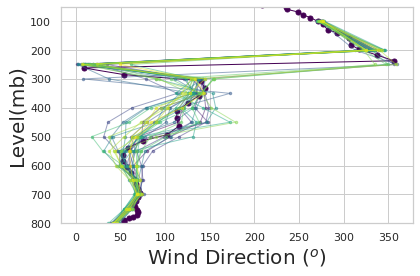

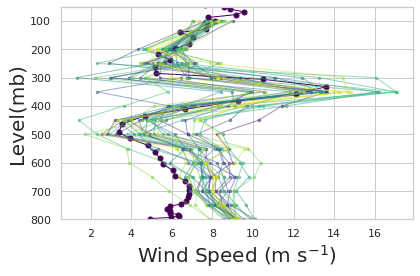

In [20]:
%autoreload
d1 = datetime.datetime(2020,10,21)
dt = datetime.timedelta(hours=21)
print(d1+dt)
def process(ax,xl=''):
    ax.set_ylim(800,50)
    ax.set_ylabel('Level(mb)',fontsize=20)
    ax.set_xlabel(xl,fontsize=20)

ax1, ax2 = cp.windspd(d1+dt)
process(ax1,'Wind Direction ($^o$)')
#plt.tight_layout()
plt.sca(ax1)
plt.tight_layout()
plt.savefig('a{}_GEFS_vs_GFS0p25.png'.format('wdir'))
#plt.show()
process(ax2,'Wind Speed (m s$^{-1}$)')
plt.sca(ax2)
plt.tight_layout()
plt.savefig('{}_GEFS_vs_GFS0p25.png'.format('wspd'))

2020-10-21 21:00:00


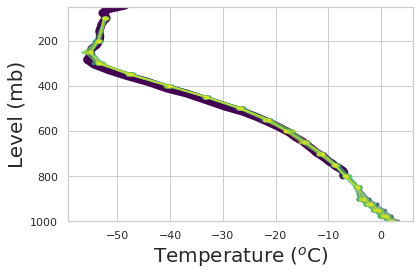

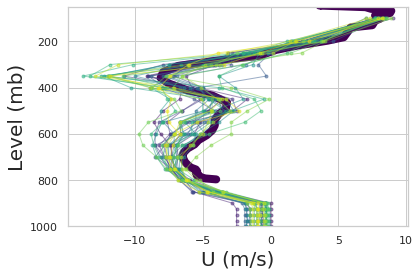

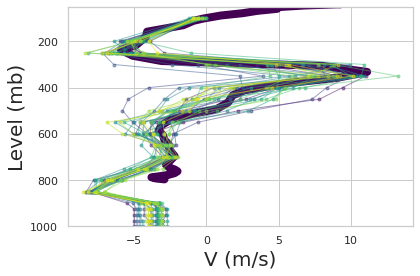

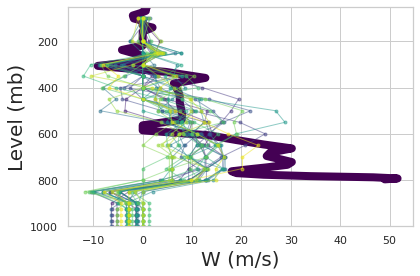

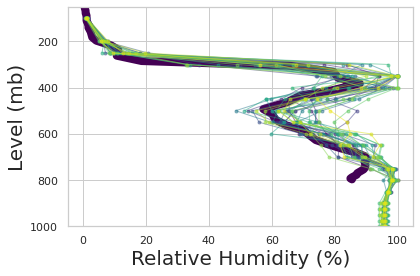

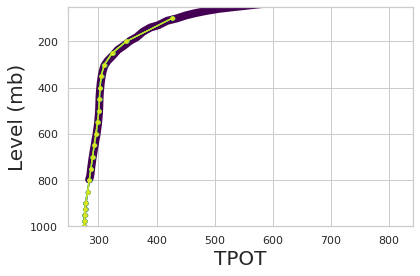

In [23]:
%autoreload
dt = datetime.timedelta(hours=21)
print(d1+dt)

for var in ['TEMP','UWND_rot','VWND_rot','WWND','RELH','TPOT']:
#for var in ['WWND']:
    ax = cp.check_3d(var,d1+dt)
    if var == 'TKEN':
       ax.set_ylim(900,100)
    ax.set_ylim(1000,50)
    plt.tight_layout()
    plt.savefig('{}_GEFS_vs_GFS0p25.png'.format(var))
    plt.show()

# NOTE HRRR WWND is in mb/h.

### Some Notes:

* Removal of 150 mb level was successful.

*Although USTAR is not available UMOF and VMOF are available and should be as good or better than USTAR.

*precip is coded as TPP6.

*DSWF sign agrees with GFS0p25.

*vertical levels go up to 20 hPa. (spacing is 200,150,100,50,20 near the top). However according to profile. vertical velocity is not available for the top two levels (50 and 20). RELH is not available for the top level (20).


